In [295]:
import networkx as nx
import matplotlib.pyplot as plt

In [296]:
SEARCH_DEPTH = 2  #Set the search depth here                       
SEED = 1  #Set the seed page here


## 1.1 Setting up fringe and visited sets

In [297]:
#SEED = SEED.title()
fringe = [(0, SEED)]  # The queue of pages we have found but not yet visited
done_set = set()  # The set of pages we have visited
g = nx.Graph()  # The directed graph of pages we have visited
n = nx.gnp_random_graph(1000, 0.0074, seed=42)


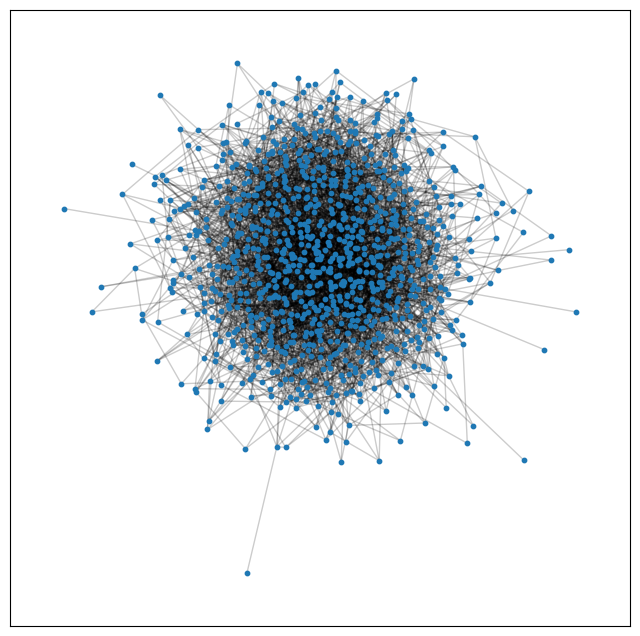

In [298]:
# testing the code with a small example graph

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(n, seed=42)
nx.draw_networkx_nodes(n, pos, node_size=10)
nx.draw_networkx_edges(n, pos, alpha=0.2)
plt.show()

In [299]:

print(f"{n.number_of_nodes()} nodes, {n.number_of_edges()} edges")


1000 nodes, 3713 edges


## 1.2 Load the seed page
Check whether the seed page exists.

In [300]:

layer, page = 0, SEED
done_set.add(SEED)


## 1.3 Build the network
Using Breadth First Search (BFS) to build the network.

In [301]:
%%time

progress = {"nodes": [], "fringe": [], "layer": []}


while fringe:

    print(f"{layer} - {page}, nodes: {len(done_set)}, fringe: {len(fringe)}")
    layer, page = fringe.pop(0)

    progress["nodes"].append(len(done_set))
    progress["fringe"].append(len(fringe))
    progress["layer"].append(layer)
    

    for link in n.neighbors(page):
        g.add_edge(page, link)
        if link not in done_set:
            done_set.add(link)
            if layer < SEARCH_DEPTH:
                fringe.append((layer + 1, link))


0 - 1, nodes: 1, fringe: 1
0 - 1, nodes: 6, fringe: 5
1 - 29, nodes: 7, fringe: 5
1 - 136, nodes: 15, fringe: 12
1 - 394, nodes: 29, fringe: 25
1 - 810, nodes: 34, fringe: 29
1 - 964, nodes: 37, fringe: 31
2 - 715, nodes: 49, fringe: 30
2 - 14, nodes: 58, fringe: 29
2 - 103, nodes: 66, fringe: 28
2 - 399, nodes: 74, fringe: 27
2 - 478, nodes: 86, fringe: 26
2 - 530, nodes: 95, fringe: 25
2 - 635, nodes: 102, fringe: 24
2 - 774, nodes: 113, fringe: 23
2 - 870, nodes: 119, fringe: 22
2 - 70, nodes: 128, fringe: 21
2 - 121, nodes: 134, fringe: 20
2 - 183, nodes: 139, fringe: 19
2 - 237, nodes: 145, fringe: 18
2 - 264, nodes: 150, fringe: 17
2 - 331, nodes: 159, fringe: 16
2 - 426, nodes: 164, fringe: 15
2 - 430, nodes: 170, fringe: 14
2 - 482, nodes: 173, fringe: 13
2 - 568, nodes: 183, fringe: 12
2 - 674, nodes: 187, fringe: 11
2 - 938, nodes: 193, fringe: 10
2 - 949, nodes: 197, fringe: 9
2 - 973, nodes: 201, fringe: 8
2 - 268, nodes: 209, fringe: 7
2 - 617, nodes: 215, fringe: 6
2 - 70

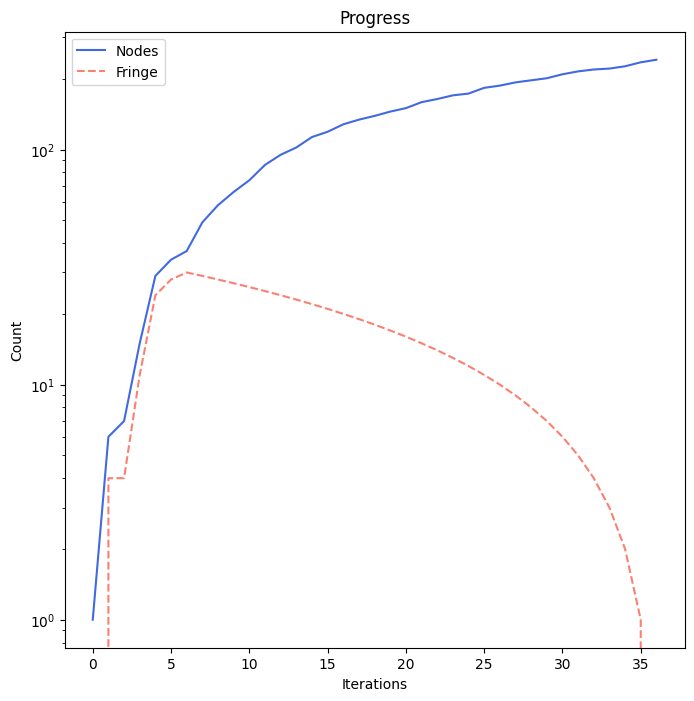

In [302]:
#plotting the progress
plt.figure("Progress", figsize=(8, 8))
plt.plot(progress["nodes"], label="Nodes", color="royalblue", linestyle="-")
plt.plot(progress["fringe"], label="Fringe", color="salmon", linestyle="--")
# log scale
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Count")
plt.title("Progress")
plt.legend()
plt.show()


g -> 245 nodes, 284 edges
n -> 1000 nodes, 3713 edges


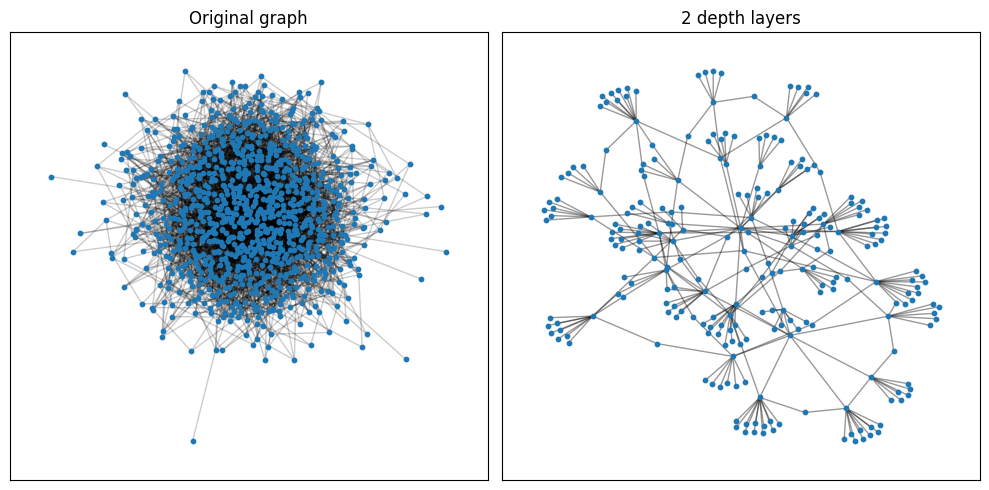

In [305]:
print(f"g -> {g.number_of_nodes()} nodes, {g.number_of_edges()} edges")
print(f"n -> {n.number_of_nodes()} nodes, {n.number_of_edges()} edges")

plt.figure(figsize=(10, 5))
plt.subplot(121)

pos = nx.spring_layout(n, seed=42)
nx.draw_networkx_nodes(n, pos, node_size=10)
nx.draw_networkx_edges(n, pos, alpha=0.2)
plt.title("Original graph")

plt.subplot(122)
plt.title(f"{SEARCH_DEPTH} depth layers")
pos = nx.spring_layout(g, seed=42)
nx.draw_networkx_nodes(g, pos, node_size=10)
nx.draw_networkx_edges(g, pos, alpha=0.4)

plt.tight_layout()
plt.show()


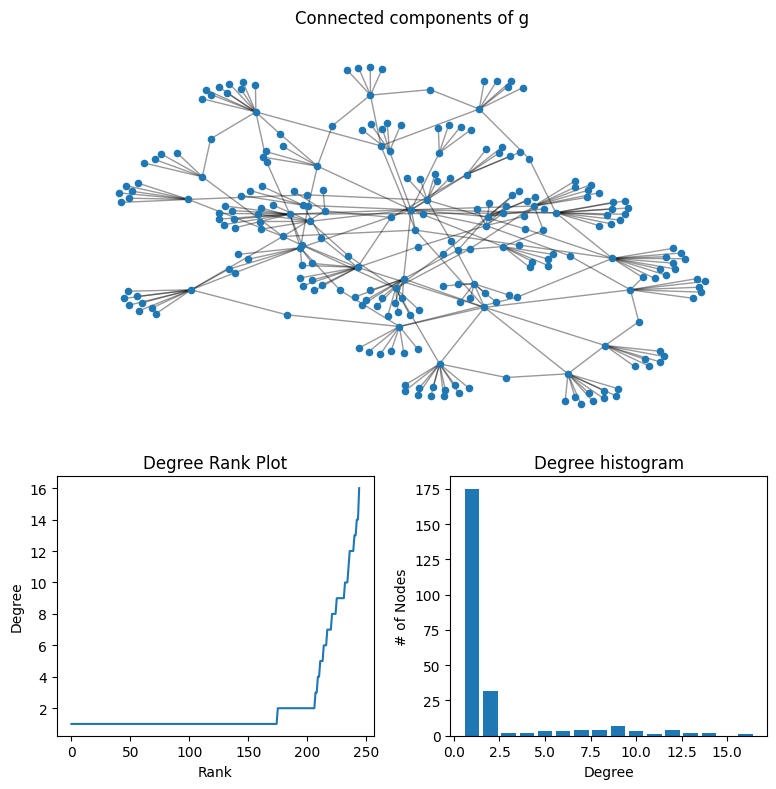

In [320]:
import numpy as np

degree_sequence = sorted((d for _, d in g.degree()))

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of g")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()